# Analyzing Time Series Data: Weather Station Data 

## Exploratory Analysis

###  Learning Goals 

- Begin creating reproducible, sharable worklows
- Become familiar with components of data analysis
    - Read data
    - Transform/ Analyze
    - Visualize/ Communicate
- Learn how to read in time series data into python
- Understand the difference between a time series and non sequential data
- Realize how easy it is to make reproducible graphs

### Introduction

When doing data analysis, it is most often a good idea to get a general sense of the data. 

Because we are dealing with tabular data, we can simply load the data into pandas and start exploring. To do so, we need to load the pandas library like this: 


In [1]:
import pandas as pd


Remember that our analysis project is organized in a directory structure like this:

```
   <parent directory>
                    |- code/
                    |     |- exploratoryAnalysis.ipynb
                    |     |- ..
                    |
                    |- data/
                    |     |- USC00442208_19000101-20240122.csv
                    |     |- DataOrderConfirmation.pdf
                    |     |- Link2Documentation.txt
                    |
                    |- results/
```
## Reading data 

This means we have to tell pandas the directory in which to find our data. Typically, we do this using `relative paths`, which specify the location of the file in relationship to the location of the notebook.

Here, our notebook is located in the `code` directory, while the data is located in the `data` directory. 

To naviate from the `code` directory to the data directory, we need to move up to the `<parent directory>` and then down into the `data` directory. 

The command to move up a directory is: `../`
We can then add the `data` directory and the filename specify the data file like this: 

`'../data/USC00442208_19000101-20240122.csv'`

You should recall from the LinkedIn Learning course, that you can read _csv-files_ into a tabular data frame using the `pd.read_csv(<file location>)` command.   

In [2]:
data = pd.read_csv('../data/USC00442208_19000101-20240122.csv')

Lets look at the first few rows of the data:

In [3]:
data.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
0,USC00442208,"DALE ENTERPRISE, VA US",1900-01-01,NaN,NaN,0.0,0.0,25.0,-5.6,-14.4,NaN,NaN
1,USC00442208,"DALE ENTERPRISE, VA US",1900-01-02,NaN,NaN,0.0,0.0,0.0,1.7,-17.2,NaN,NaN
2,USC00442208,"DALE ENTERPRISE, VA US",1900-01-03,NaN,NaN,0.0,0.0,0.0,2.8,-12.8,NaN,NaN
3,USC00442208,"DALE ENTERPRISE, VA US",1900-01-04,NaN,NaN,0.0,0.0,0.0,5.6,-16.1,NaN,NaN
4,USC00442208,"DALE ENTERPRISE, VA US",1900-01-05,NaN,NaN,0.0,0.0,0.0,11.7,-5.6,NaN,NaN


As expected, we find a **time series** of weather data at a _single location_ and the _resolution is daily_.

Let's explore the data a bit further

In [4]:
data.describe()

,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
count,9.000000,9.000000,44847.000000,42839.000000,39628.000000,44855.000000,44801.000000,44373.000000,2440.000000
mean,2.777778,11.844444,2.565030,1.822522,6.303144,18.604945,5.255697,12.592921,5.368402
std,1.641476,10.479040,7.195768,15.379604,33.223893,9.941317,9.131053,9.923029,36.966610
min,2.000000,0.000000,0.000000,0.000000,0.000000,-13.300000,-31.700000,-51.100000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,10.600000,-1.700000,4.400000,0.000000
50%,2.000000,11.400000,0.000000,0.000000,0.000000,20.000000,5.600000,13.300000,0.000000
75%,3.000000,19.800000,1.300000,0.000000,0.000000,27.200000,13.300000,21.100000,0.000000
max,7.000000,29.700000,254.000000,610.000000,762.000000,40.600000,32.200000,38.300000,635.000000


In [6]:
data.dtypes

STATION     object
NAME        object
DATE        object
DAPR       float64
MDPR       float64
PRCP       float64
SNOW       float64
SNWD       float64
TMAX       float64
TMIN       float64
TOBS       float64
WESD       float64
dtype: object

We can see that some columns are treated as text (`object`) and some as numbers (`float64`). For example, pandas thinks right now that the `DATE` column is text and not a date. _Don't worry about this now, but we will come back to that later._

## Exploratory Analysis 

How about, we just plot one of the colums, for example daily maximum temperature `TMAX`:

data.plot(x='DATE',y='TMAX')

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>
    
What do we learn from this?

How can we make this better?

</div>


There is just too much data displayed. Maybe we should focus on a few years of data first. 

**So how can we select data for only some years?**

Pandas allows us to easily select data using the _index_ of the table with the `.loc[<range>]` method. 

In [7]:
data.loc[0:10]

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
0,USC00442208,"DALE ENTERPRISE, VA US",1900-01-01,NaN,NaN,0.0,0.0,25.0,-5.6,-14.4,NaN,NaN
1,USC00442208,"DALE ENTERPRISE, VA US",1900-01-02,NaN,NaN,0.0,0.0,0.0,1.7,-17.2,NaN,NaN
2,USC00442208,"DALE ENTERPRISE, VA US",1900-01-03,NaN,NaN,0.0,0.0,0.0,2.8,-12.8,NaN,NaN
3,USC00442208,"DALE ENTERPRISE, VA US",1900-01-04,NaN,NaN,0.0,0.0,0.0,5.6,-16.1,NaN,NaN
4,USC00442208,"DALE ENTERPRISE, VA US",1900-01-05,NaN,NaN,0.0,0.0,0.0,11.7,-5.6,NaN,NaN
5,USC00442208,"DALE ENTERPRISE, VA US",1900-01-06,NaN,NaN,0.0,0.0,0.0,13.9,-2.2,NaN,NaN
6,USC00442208,"DALE ENTERPRISE, VA US",1900-01-07,NaN,NaN,0.0,0.0,0.0,17.8,-5.6,NaN,NaN
7,USC00442208,"DALE ENTERPRISE, VA US",1900-01-08,NaN,NaN,0.0,0.0,0.0,17.8,1.1,NaN,NaN
8,USC00442208,"DALE ENTERPRISE, VA US",1900-01-09,NaN,NaN,0.0,0.0,0.0,8.3,-11.7,NaN,NaN
9,USC00442208,"DALE ENTERPRISE, VA US",1900-01-10,NaN,NaN,0.0,0.0,0.0,13.3,-2.2,NaN,NaN


If we want to select the time period by index, then we should make the `date` column our index. We also need to make sure that pandas ***understands*** that this is a date and not some random text. 

Let's read in the data again with some additional options.
These options and many more are described in detail in the [.read_csv() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [8]:
data = pd.read_csv('../data/USC00442208_19000101-20240122.csv',
                #  Make sure the dates import in datetime format. We tell pandas that this is a date and not text. 
                parse_dates = ['DATE'],
                #  Set DATE as the index so you can subset data by time period
                index_col = ['DATE']
                  )


data

,STATION,NAME,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD
DATE,,,,,,,,,,,
1900-01-01,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,-5.6,-14.4,NaN,NaN
1900-01-02,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,1.7,-17.2,NaN,NaN
1900-01-03,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,2.8,-12.8,NaN,NaN
1900-01-04,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,5.6,-16.1,NaN,NaN
1900-01-05,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,0.0,11.7,-5.6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-18,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,NaN,NaN,NaN,NaN
2024-01-19,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,2.5,18.0,25.0,NaN,NaN,NaN,NaN
2024-01-20,USC00442208,"DALE ENTERPRISE, VA US",NaN,NaN,0.0,0.0,25.0,NaN,NaN,NaN,NaN


Let's plot this again, but only from 2001 to 2010. 

<Axes: xlabel='DATE'>

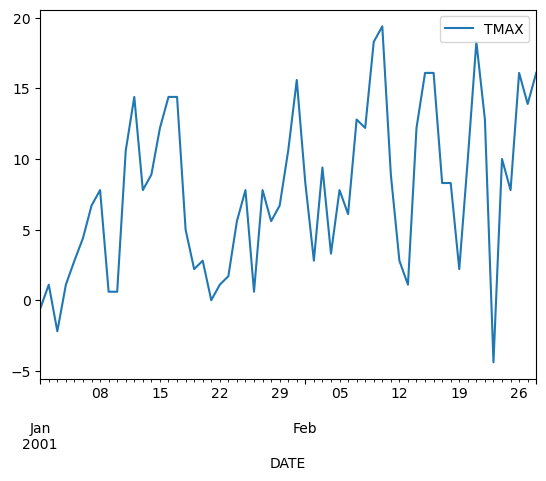

In [9]:
data.loc["2001-1":"2001-2"].plot(y='TMAX')

Note, that our x-axis has become much less messy, because pandas now knows its a date. 

<div class="alert alert-info" role="alert">
<h3 class="alert-heading">Questions</h3>
    
What do we see now? 

</div>

Note, that our x-axis has become much less messy, because pandas now knows its a date. 

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>
    
Try selecting and plotting data for Summer 2003 only.
    
- Modify the code below.
- Do you remember to add a title and labels? 
  - If not, you can have a look in the [documentation for df.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)  
</div>



<Axes: xlabel='DATE'>

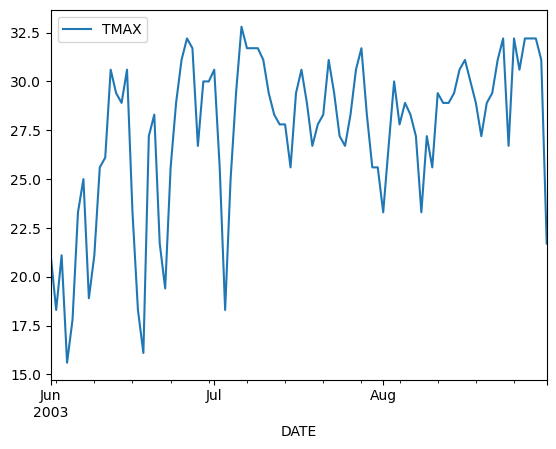

In [10]:
data.loc["2003-6-01": "2003-8-31"].plot(y='TMAX')

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>
    
Lets learn more about maximum temperatures during Summer 2003 by creating a histogram instead.
    
- Modify the code below by telling plot to make a histogram .plot(kind='hist').
- The number of bins `bins` should be 20.  
</div>

In [11]:
data.loc["2003-6-01":"2003-8-31"].plot(y='TMAX'), ylabel = 'Temperature $^o$C'

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3077109516.py, line 1)

In [23]:
data.loc["2001-06":"2001-08"].plot(kind='histogramms', x='TMIN',y='TMAX')

ValueError: histogramms is not a valid plot kind

<div class="alert alert-warning" role="warning">
<h3 class="alert-heading">Challenge</h3>
    
Let's see whether there is a relationship between summertime daily minimum and maximum temperatures. For this we can create a 'scatter' plot. 
    
- Modify the code below by setting the plot `kind` to scatter. 
- Put `TMIN` on the x-axis and `TMAX` on the y-axis.  
</div>

<AxesSubplot:xlabel='DATE'>

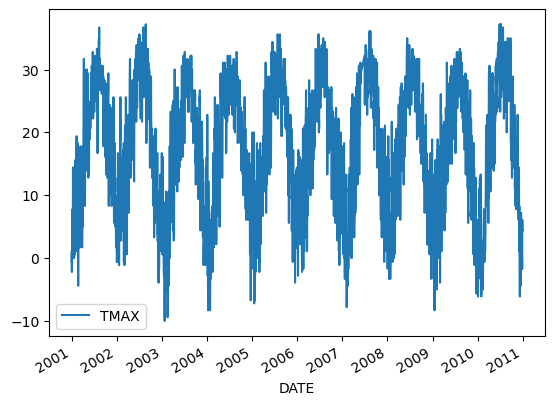

In [45]:
data.loc["2001":"2010"].plot(y='TMAX')

## Take-aways

### Technical

After completing this exercise you should be able to 

- read time series data in pandas.
- describe the data 
- graph subsets of the data using
    - line plots
    - histogramms
    - x,y plots 


There are a few important take-aways. For example:

1. We can easily produce reproducible workflows that can be shared via Github
2. Exploratory analyis is about quickly understanding the most important features of our data 


### Climate/ Environmental Systems

1. Climate data has structure. There are annual and daily cycles and we need to take them into account when analyzing data.
2. Data points are not independent from each other, and there are also relationships between variables, such as between `TMIN` and `TMAX`
3. Variation and uncertainty are really important. 